In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
%matplotlib inline

In [169]:
table = pd.read_csv("bestsellers with categories.csv")

In [170]:
print(table.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [171]:
print(table.shape)

(550, 7)


Про скільки книг зберігає дані датасет?
Датасет зберігає дані про 550 книг!

In [172]:
table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [173]:
sum = table.isna().sum()
print(sum)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Відповідь: Чи є в якихось змінних пропуски? (Так / ні).
Ні!

In [174]:
print(table["genre"].unique())

['Non Fiction' 'Fiction']


Відповідь: Які є унікальні жанри?Унікальних жанрів немає!

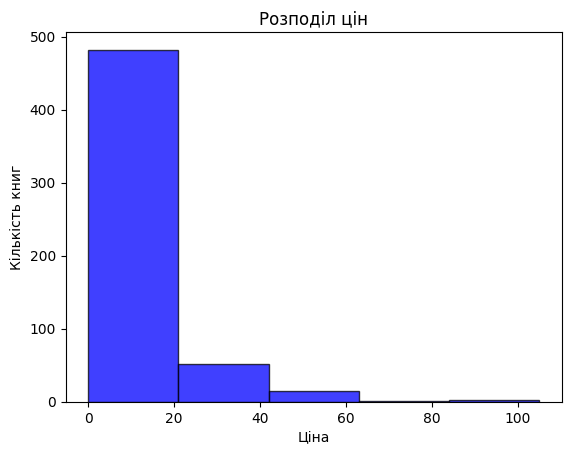

0
105
13.1
11.0


In [175]:
table['price'].plot(kind='hist', bins=5, alpha=0.75, color='blue', edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()
print(table['price'].min())
print(table['price'].max())
print(table['price'].mean())
print(table['price'].median())

Відповідь: Максимальна ціна? 105$
Відповідь: Мінімальна ціна? 0$
Відповідь: Середня ціна? 13.1$
Відповідь: Медіанна ціна? 11.0$

In [176]:
print(table["user_rating"].max())

4.9


Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [177]:
print(table[table["user_rating"] == 4.9].shape)

(52, 7)


Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52 книги!

In [178]:
print(table.nlargest(1,"reviews"))

                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


Відповідь: Яка книга має найбільше відгуків? Відповідь:Where the Crawdads Sing

In [179]:
print(table[table["year"]==2015].nlargest(1,"price"))

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:Publication Manual of the American Psychologic...

In [180]:
print(table[(table['genre'] == 'Fiction') & (table['year'] == 2010)].shape)

(20, 7)


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:20

In [181]:
print(table[(table['user_rating'] == 4.9) & (table['year'].isin([2010, 2011]))].shape)

(1, 7)


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:Одна книга

In [182]:
print(table[(table["year"]==2015) & (table["price"] < 8 )].sort_values(by="price"))

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
123                               Giraffes Can't Dance       Giles Andreae   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
224                                   Love You Forever       Robert Munsch   
478                        The Very Hungry Caterpillar          Eric Carle   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
201  Killing Reagan: The Violent Assault That Chang...       Bil

Відповідь: Яка книга остання у відсортованому списку? Відповідь:Old School (Diary of a Wimpy Kid #10)

In [183]:
group_fd = table.groupby("genre").agg({
    'price': ['min', 'max']})
print(group_fd)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82$

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0$

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105$

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0$

In [184]:
book_count_by_author = table.groupby('author').agg({'name': 'count'}).reset_index().sort_values(by="name")
book_count_by_author.columns = ['author', 'book_count']
print(book_count_by_author)

                                 author  book_count
1                        Adam Gasiewski           1
2                         Adam Mansbach           1
3                             Adir Levy           1
4            Admiral William H. McRaven           1
6                            Alan Moore           1
..                                  ...         ...
11   American Psychological Association          10
197                        Rick Riordan          11
92                         Gary Chapman          11
226                     Suzanne Collins          11
120                         Jeff Kinney          12

[248 rows x 2 columns]


Відповідь: Якої розмірності вийшла таблиця? Відповідь:248 рядків

Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney

Відповідь: Скільки книг цього автора? Відповідь:12 книг

In [185]:
book_count_by_author_1 = table.groupby('author').agg({'reviews': 'mean'}).reset_index().sort_values(by="reviews")
print(book_count_by_author_1)

                author  reviews
247       Zhi Gang Sha    128.5
184  Peter A. Lillback    408.0
79   Edward M. Kennedy    438.0
132        Jon Stewart    440.0
143   Larry Schweikart    460.0
..                 ...      ...
142     Kristin Hannah  49288.0
100      Gillian Flynn  57271.0
168     Michelle Obama  61133.0
180      Paula Hawkins  79446.0
68         Delia Owens  87841.0

[248 rows x 2 columns]


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:Zhi Gang Sha

Відповідь: Який у цього автора середній рейтинг? Відповідь: 128.5

In [186]:
result_table = pd.concat([book_count_by_author,book_count_by_author_1["reviews"]],axis=1)
print(result_table.sort_values(by=["book_count","reviews"]))


                                 author  book_count       reviews
184                   Peter A. Lillback           1    408.000000
79                    Edward M. Kennedy           1    438.000000
132                         Jon Stewart           1    440.000000
143                    Larry Schweikart           1    460.000000
159                          Mark Twain           1    491.000000
..                                  ...         ...           ...
11   American Psychological Association          10   8580.000000
197                        Rick Riordan          11   4015.363636
92                         Gary Chapman          11  13268.909091
226                     Suzanne Collins          11  25302.636364
120                         Jeff Kinney          12   5623.500000

[248 rows x 3 columns]


Відповідь: Який автор перший у списку? Peter A. Lillback

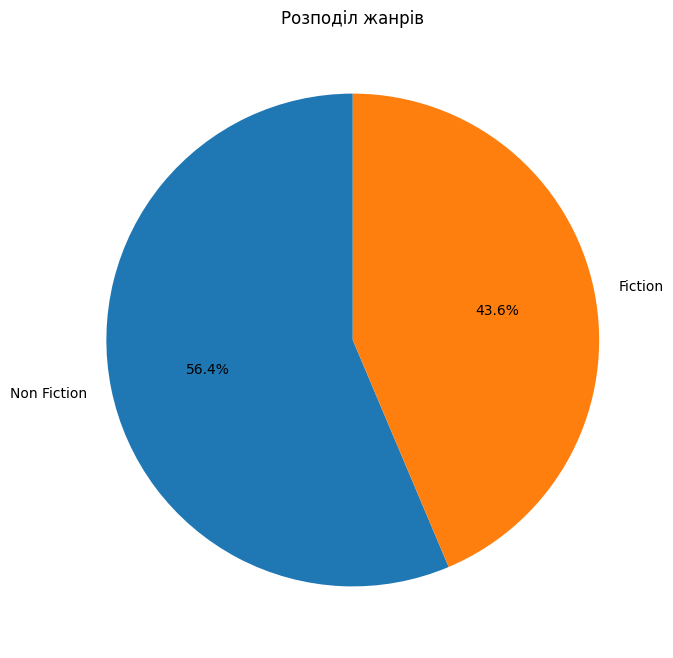

In [187]:
category_counts = table['genre'].value_counts()
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Розподіл жанрів')
plt.ylabel('')
plt.show()

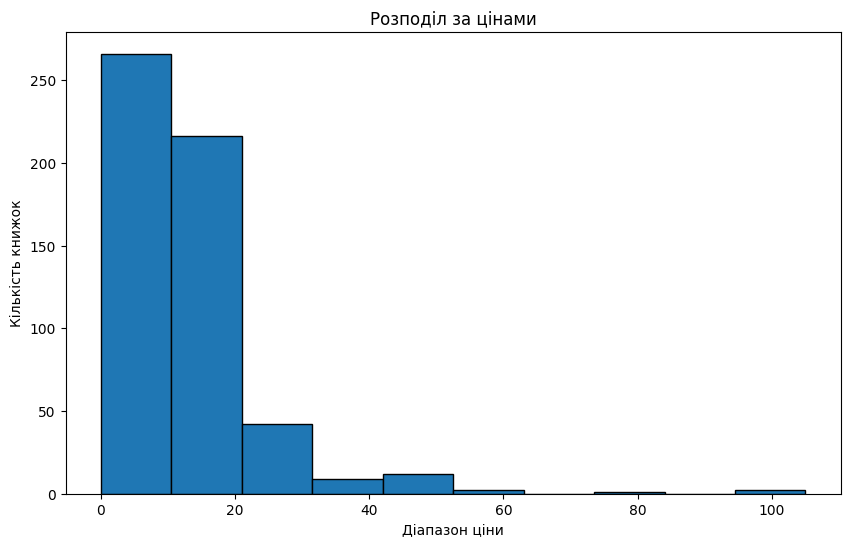

In [188]:
plt.figure(figsize=(10, 6))
table['price'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Розподіл за цінами')
plt.ylabel('Кількість книжок')
plt.xlabel('Діапазон ціни')
plt.show()

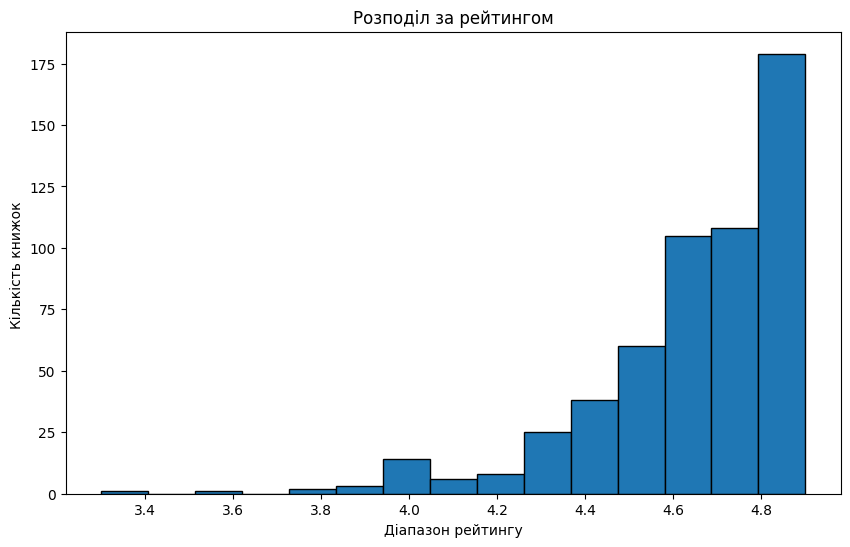

In [189]:
plt.figure(figsize=(10, 6))
table['user_rating'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Розподіл за рейтингом')
plt.ylabel('Кількість книжок ')
plt.xlabel('Діапазон рейтингу')
plt.show()